## Visualização dos resultados



### Leitura dos dados

In [107]:
import struct
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [69]:
# reading binary data (To do)

with open('output.bin', 'rb') as file:
    [h] = struct.unpack('f', file.read(4))
    N = int.from_bytes(file.read(4), byteorder='little')
    M = int.from_bytes(file.read(4), byteorder='little')

print(h)
print(N)
print(M)

6.9466067631410276e+28
32766
1868592376


In [70]:
# reading ascii data

with open('output.dat', 'r') as file:
    h = float(file.readline())
    N = int(file.readline())
    M = int(file.readline())
    u = np.zeros((N, M), float)

    for j in range(M):
        u[j] = file.readline()[:-2].split(sep=" ")


print(h)
print(N)
print(M)
# print(u)

0.0025
400
400


## Método de Jacobi

### Desempenho

A tabela a seguir apresenta o total de iterações, valor central e tempo gasto para cada execução.

In [102]:
data = {
    'Iterações': [  127816,   127816,   127816,   127816],
    'u(.5, .5)': [-3.75572, -3.75572, -3.75572, -3.75572],
    'Tempo (s)':     [  24.482,  16.9711,  12.3548,  12.7624],
}

df = pd.DataFrame(data, index=[1, 2, 4, 8])
df.index.name = 'threads'
df

,Iterações,"u(.5, .5)",Tempo
threads,,,
1,127816,-3.75572,24.4820
2,127816,-3.75572,16.9711
4,127816,-3.75572,12.3548
8,127816,-3.75572,12.7624


#### Speed-up e Eficiência paralela

In [118]:
threads    = list(df.index)
speedup    = []
eficiencia = []

seq = df.loc[1, 'Tempo (s)']

for i in df['Tempo (s)']:
    speedup.append(seq/i)
    eficiencia.append(100*speedup[-1]/seq)


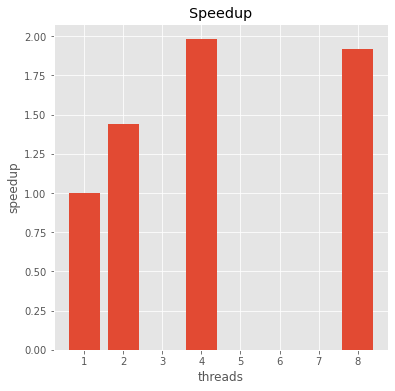

In [119]:
plt.figure(figsize=(6, 6))
plt.bar(threads, speedup)
plt.title('Speedup')
plt.xlabel('threads')
plt.ylabel('speedup')
plt.show()

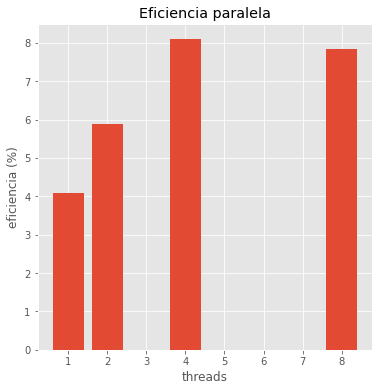

In [121]:
plt.figure(figsize=(6, 6))
plt.bar(threads, eficiencia)
plt.title('Eficiencia paralela')
plt.xlabel('threads')
plt.ylabel('eficiencia (%)')
plt.show()

#### Plot do resultado

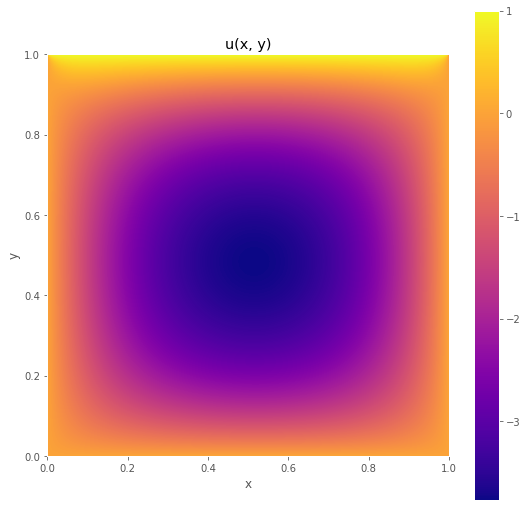

In [71]:
plt.figure(figsize=(9, 9))
plt.imshow(u, cmap='plasma', origin='lower', extent=(0, h*N, 0, h*M))
plt.colorbar()
plt.title('u(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(False)
plt.show()